# Car evaluation

**By:** Juan Bernardo Benavides Rubio

---

Let's go with the second project, this one works with data from cars. 

First some basic imports as before.


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The problem

The first step when doing Machine learning is to understand the problem that you want to solve. In this case, factory is in the process of designing cars and they want to classify their cars accoording to some basic information from each that they have. The idea is to develop a Machine Learning algorithm that tells in which category falls each car. The categories are: 

- Unacceptable
- Acceptable
- Good
- Very good

## The data

The second step has to do with data which is divided in 3 substeps:

In this case we'll use data found [here](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation).

Let's explore the data a little.

In [40]:
names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data = pd.read_csv("data/car.data", names=names)
data.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Here we can see that our data is non-numeric. However, given that ML models are developed through different mathematical methods, we need numerical data for them to work. 

Fortunately, scikit-learn covers this too. We have to use a label encoder that gives a numerical label to each of the different categorical possibilities.


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [43]:
buying_fit = le.fit(data['buying'])
buying_fit.classes_

array(['high', 'low', 'med', 'vhigh'], dtype=object)

In [44]:
buying_fit.transform(['vhigh', 'vhigh', 'low', 'high', 'med', 'high', 'med'])

array([3, 3, 1, 0, 2, 0, 2])

In [45]:
buying = buying_fit.transform(data['buying'])
buying

array([3, 3, 3, ..., 1, 1, 1])

In [46]:
data['doors']

0           2
1           2
2           2
3           2
4           2
        ...  
1723    5more
1724    5more
1725    5more
1726    5more
1727    5more
Name: doors, Length: 1728, dtype: object

In [47]:
doors = le.fit_transform(data['doors'])
doors

array([0, 0, 0, ..., 3, 3, 3])

In [48]:
buying = le.fit_transform(data['buying'])
maint = le.fit_transform(data['maint'])
doors = le.fit_transform(data['doors'])
persons = le.fit_transform(data['persons'])
lug_boot = le.fit_transform(data['lug_boot'])
safety = le.fit_transform(data['safety'])


In [49]:
target = "class"
class_fit = le.fit(data['class'])
class_transform = class_fit.transform(data['class'])

In [50]:
X = np.array(list(zip(buying, maint, doors, persons, lug_boot, safety)))
y = class_transform
y.shape

(1728,)

### Save some data for testing the model

Always remember to save some data for testing your model with new data.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (1555, 6)
y_train shape: (1555,)


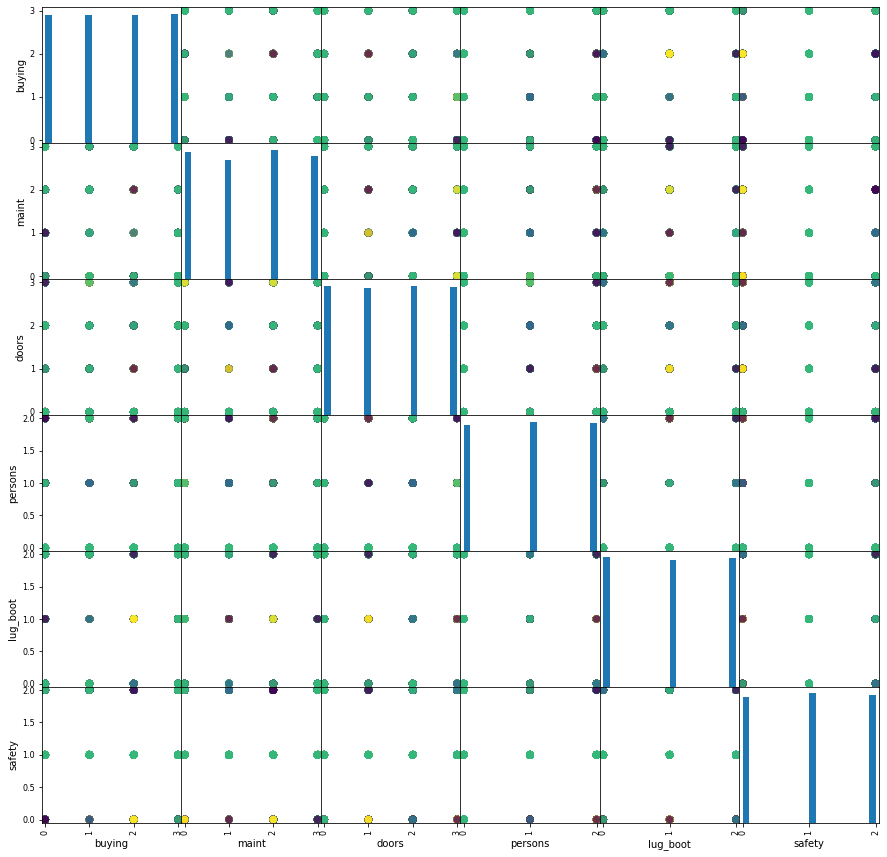

In [53]:
df = pd.DataFrame(X_train, columns =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'] )

grr = pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

## Pick a model

This is a classification problem because we want the cars to be classified into different categories that are not conituous and not too much. 

We'll work with K Nearest Neighbors because it's the simplest for starting.

## Train and test the model

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8901734104046243

## Fine Tuning

We can see that the score changes accoording to the number of neighbors. This is called a hyper-parameter and most models have them. They are parameters that we must set arbitrarily and try to see which is the best fit. 
let's try a first aproach:

In [56]:
best = 0
for n in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)

    if score > best:
        best = score
        n_best = n

best, n_best

(0.9248554913294798, 9)

However, this can be baised to this particular data, we need a more general result that can be seen with cross-validation:

In [57]:
from sklearn.model_selection import cross_val_score

best = 0
for n in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=n)

    scores = cross_val_score(knn, X_train, y_train, cv=5)

    if scores.mean() > best:
        best = scores.mean()
        best_std= scores.std()
        n_best = n

best, best_std,n_best

(0.92475884244373, 0.018257324201387003, 7)

This process is what is called **Grid search** and is very common, therefore, scikit-learn has a tool that can help us to do it better. It's called Grid Search CV (Cross validation)

In [58]:
parameters = {'n_neighbors': np.arange(1, 51)}
parameters

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_search = GridSearchCV(knn, parameters, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=50),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [61]:
grid_search.score(X_test, y_test)

0.9132947976878613

In [62]:
grid_search.best_params_, grid_search.best_score_

({'n_neighbors': 7}, 0.92475884244373)

In [63]:
y_pred = grid_search.predict(X_test)
y_pred

array([2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0])

In [64]:
y_pred = class_fit.inverse_transform(y_pred)
y_test = class_fit.inverse_transform(y_test)
np.column_stack((y_pred, y_test))

array([['unacc', 'unacc'],
       ['unacc', 'acc'],
       ['unacc', 'unacc'],
       ['acc', 'acc'],
       ['unacc', 'unacc'],
       ['unacc', 'acc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['vgood', 'vgood'],
       ['acc', 'acc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['acc', 'acc'],
       ['unacc', 'unacc'],
       ['acc', 'acc'],
       ['acc', 'acc'],
       ['unacc', 'unacc'],
       ['acc', 'acc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['acc', 'acc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['unacc', 'unacc'],
       ['acc', 'acc'],
       ['acc', 'acc'],
       ['acc', 'good'],
       ['unacc', 'unacc'],
       ['unacc', 